## Random Forest

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

data = pd.read_csv('Updated_sample.csv')

features = ['IP address', 'Protocol', 'Packet Size', 'Flow Duration', 'Packets per Second', 'Min Flow Time', 'Mean Flow Time', 'Max Flow Time', 'Communication_Frequency']
target = ['device', 'Status']  

X = data[features]
y = data[target]

print(y.value_counts())
print()

X = pd.get_dummies(X, columns=['IP address', 'Protocol'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

RF = RandomForestClassifier(n_estimators=100, random_state=42, class_weight= 'balanced')
multi_target_RF = MultiOutputClassifier(RF, n_jobs=-1)

multi_target_RF.fit(X_train, y_train)

y_pred = multi_target_RF.predict(X_test)

for i, target in enumerate(target):
    print(f"Result for {target}:")
    print(f"Accuracy: {accuracy_score(y_test.iloc[:, i], y_pred[:, i])}")
    print(f"Precision: {precision_score(y_test.iloc[:, i], y_pred[:, i], average='weighted')}")
    print(f"Recall: {recall_score(y_test.iloc[:, i], y_pred[:, i], average='weighted')}")
    print(f"F1 Score: {f1_score(y_test.iloc[:, i], y_pred[:, i], average='weighted')}")
    print()


device                  Status       
Non IoT-device          Not Available    1589
Security camera         Foreign             5
Environmental detector  Local               4
Smart LED bulb          Foreign             2
dtype: int64

Result for device:
Accuracy: 0.990625
Precision: 0.981337890625
Recall: 0.990625
F1 Score: 0.9859595761381476

Result for Status:
Accuracy: 0.990625
Precision: 0.981337890625
Recall: 0.990625
F1 Score: 0.9859595761381476



c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Gradient Boosting

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

data = pd.read_csv('Updated_sample.csv')

features = ['IP address', 'Protocol', 'Packet Size', 'Flow Duration', 'Packets per Second', 'Min Flow Time', 'Mean Flow Time', 'Max Flow Time', 'Communication_Frequency']
target = ['device', 'Status'] 

X = data[features]
y = data[target]

X = pd.get_dummies(X, columns=['IP address', 'Protocol'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

GB = GradientBoostingClassifier(n_estimators=100, random_state=42)
multi_GB = MultiOutputClassifier(GB, n_jobs=-1)

multi_GB.fit(X_train, y_train)

y_pred = multi_GB.predict(X_test)

for i, target in enumerate(target):
    print(f"Result for {target}:")
    print(f"Accuracy: {accuracy_score(y_test.iloc[:, i], y_pred[:, i])}")
    print(f"Precision: {precision_score(y_test.iloc[:, i], y_pred[:, i], average='weighted')}")
    print(f"Recall: {recall_score(y_test.iloc[:, i], y_pred[:, i], average='weighted')}")
    print(f"F1 Score: {f1_score(y_test.iloc[:, i], y_pred[:, i], average='weighted')}")
    print()


Result for device:
Accuracy: 0.996875
Precision: 0.9937597962382444
Recall: 0.996875
F1 Score: 0.9953149529042387

Result for Status:
Accuracy: 0.996875
Precision: 0.9937597962382444
Recall: 0.996875
F1 Score: 0.9953149529042387



c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## CatBoost

Results for device:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Classification Report for device:
                        precision    recall  f1-score   support

Environmental detector       1.00      1.00      1.00         1
        Non IoT-device       1.00      1.00      1.00       317
       Security camera       1.00      1.00      1.00         2

              accuracy                           1.00       320
             macro avg       1.00      1.00      1.00       320
          weighted avg       1.00      1.00      1.00       320

Confusion Matrix for device:

Results for Status:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Classification Report for Status:
               precision    recall  f1-score   support

      Foreign       1.00      1.00      1.00         2
        Local       1.00      1.00      1.00         1
Not Available       1.00      1.00      1.00       317

     accuracy                           1.00       320
    macro avg       1.00      1.00      1.00       3

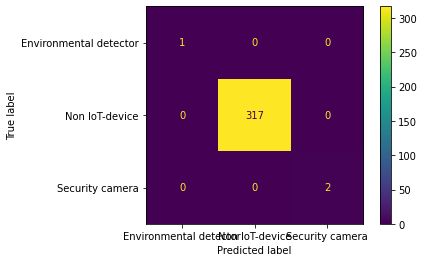

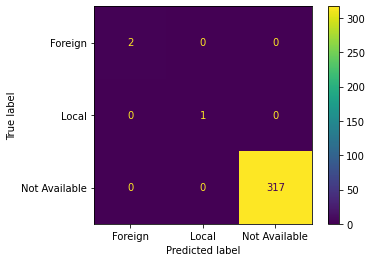

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from catboost import CatBoostClassifier

# Load the dataset
data = pd.read_csv('Updated_sample.csv')

# Select features and target columns
features = ['IP address', 'Protocol', 'Packet Size', 'Flow Duration', 'Packets per Second', 'Min Flow Time', 'Mean Flow Time', 'Max Flow Time', 'Communication_Frequency']
target = ['device', 'Status']

# Extract features and targets from the DataFrame and encode categorical features
X = data[features]
y = data[target]

# One-hot encode categorical features
X = pd.get_dummies(X, columns=['IP address', 'Protocol'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the CatBoost model using MultiOutputClassifier
model = CatBoostClassifier(iterations=100, random_state=42, verbose=0, loss_function="MultiClass")
multi_cb = MultiOutputClassifier(model, n_jobs=-1)

# Fit the model
multi_cb.fit(X_train, y_train)

# Predict on the test set
y_pred = multi_cb.predict(X_test)

y_pred = y_pred.squeeze()

# Calculate and print evaluation metrics for each target
for i, target_name in enumerate(target):
    print(f"Results for {target_name}:")
    print(f"Accuracy: {accuracy_score(y_test[target_name], y_pred[:, i])}")
    print(f"Precision: {precision_score(y_test[target_name], y_pred[:, i], average='weighted')}")
    print(f"Recall: {recall_score(y_test[target_name], y_pred[:, i], average='weighted')}")
    print(f"Classification Report for {target_name}:")
    print(classification_report(y_test[target_name], y_pred[:, i]))
    print(f"Confusion Matrix for {target_name}:")
    ConfusionMatrixDisplay.from_predictions(y_test.iloc[:, i], y_pred[:, i])
    print()